In [15]:
# Useful imports
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from us import states

In [16]:
# Read the CSV file
FF_Locations = pd.read_csv("Location Data\\Datafiniti_Fast_Food_Restaurants.csv")

# Group all the data by states
FF_by_state = FF_Locations.groupby('province').size().reset_index(name='counts')

# Use match() to find the corresponding full state names
FF_by_state['region'] = FF_by_state['province'].apply(lambda x: states.lookup(x).name if states.lookup(x) is not None else x)

# Convert to lowercase
FF_by_state['region'] = FF_by_state['region'].str.lower()





In [17]:
# Read the US population Data
us_map = gpd.read_file("Location Data\\cb_2018_us_state_500k.shp")
merged_data = us_map.set_index('STUSPS').join(FF_by_state.set_index('province'))

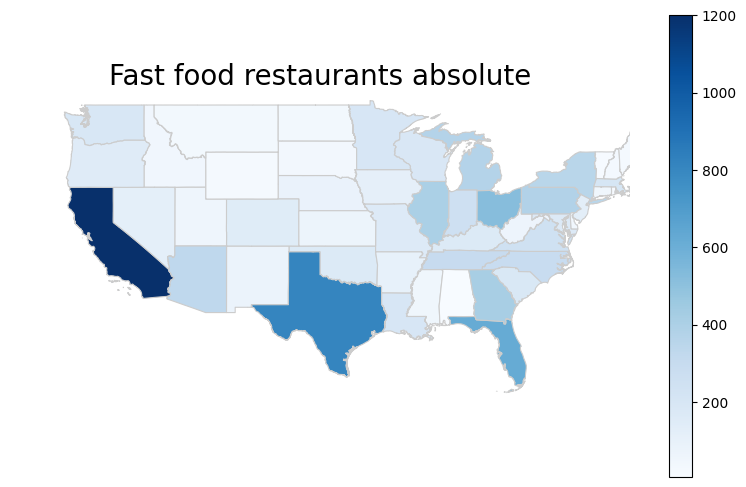

In [18]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size

merged_data.plot(column='counts', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Fast food restaurants absolute',fontsize=20)

# Remove the border
ax.axis('off')

# Adjust the extent of the plot to focus on the area below Canada
ax.set_xlim(-130, -70)  # Adjust these values as needed
ax.set_ylim(24, 50)  # Adjust these values as needed

plt.show()


In [19]:
# Read the population data
population_data = pd.read_csv("Location Data//state_population.csv")  # Update this with your population data

# Convert the 'population' column to numeric, coercing non-numeric values to NaN
population_data['population'] = pd.to_numeric(population_data['population'], errors='coerce')

# Merge the fast food and population data
merged_data = FF_by_state.merge(population_data, left_on='region', right_on='state')

# Optional: Remove rows with NaN in the 'population' column
merged_data = merged_data.dropna(subset=['population'])

# Now you can calculate the number of fast food restaurants per capita
merged_data['counts_per_capita'] = merged_data['counts']/ merged_data['population']

# Merge your data with the map data
merged_data = us_map.set_index('STUSPS').join(merged_data.set_index('province'))

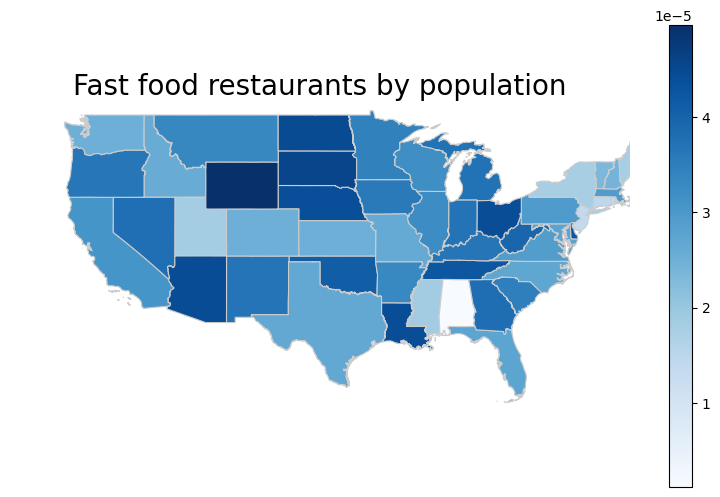

In [20]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size as needed

merged_data.plot(column='counts_per_capita', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Fast food restaurants by population',fontsize=20)

# Remove the border
ax.axis('off')

# Adjust the extent of the plot to focus on the area below Canada
ax.set_xlim(-130, -70)  # Adjust these values as needed
ax.set_ylim(24, 50)  # Adjust these values as needed

plt.show()

In [43]:
FF_Locations['type'].value_counts().head()

type
burgers       4206
chicken       1208
tacos         1208
sandwiches    1130
pizza          550
fast food      379
dessert        218
coffee          75
Name: count, dtype: int64

In [ ]:
def filter_fast_food_by_type(data, restaurant_type):
    filtered_data = data[data['type'] == restaurant_type]
    return filtered_data

In [98]:
def plot_choropleth(fast_food_type):
    # Filter the data for the specified fast food type
    filtered_data = FF_Locations[FF_Locations['type'] == fast_food_type]
    
    # Group all the data by states
    FF_by_state = filtered_data.groupby('province').size().reset_index(name='counts')

    # Use match() to find the corresponding full state names
    FF_by_state['region'] = FF_by_state['province'].apply(lambda x: states.lookup(x).name if states.lookup(x) is not None else x)

    # Convert to lowercase
    FF_by_state['region'] = FF_by_state['region'].str.lower()

    # Merge the filtered data with the map data
    merged_data = us_map.set_index('STUSPS').join(FF_by_state.set_index('province'))

    # Plot the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size as needed

    merged_data.plot(column='counts', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,vmin=0,vmax=300)

    ax.set_title(f'Fast food restaurants per capita ({fast_food_type})', fontsize=20)

    # Remove the border
    ax.axis('off')

    # Adjust the extent of the plot to focus on the area below Canada
    ax.set_xlim(-130, -70)  # Adjust these values as needed
    ax.set_ylim(24, 50)  # Adjust these values as needed

    plt.show()


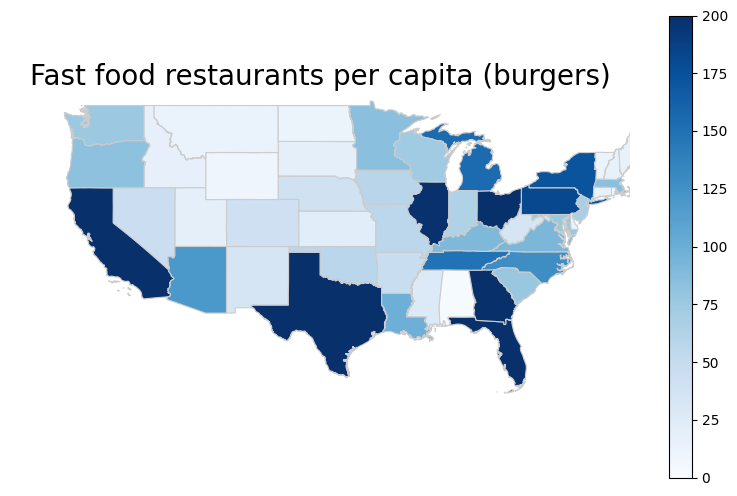

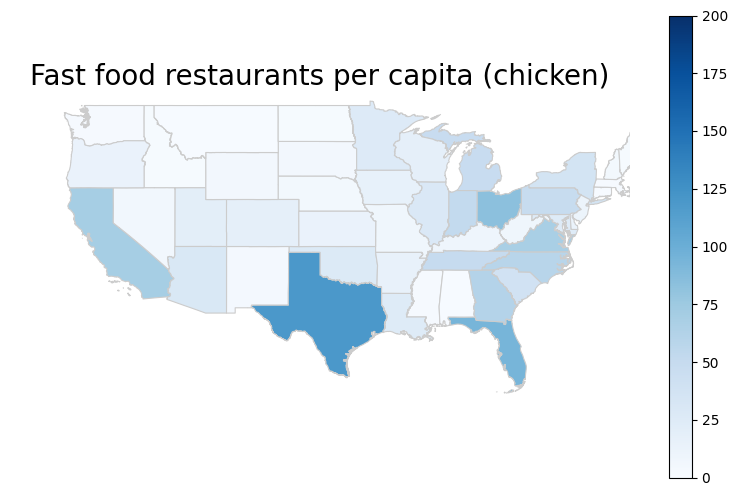

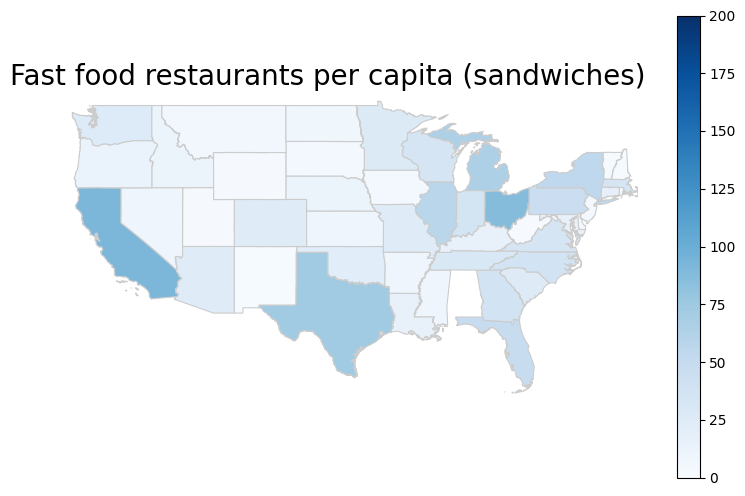

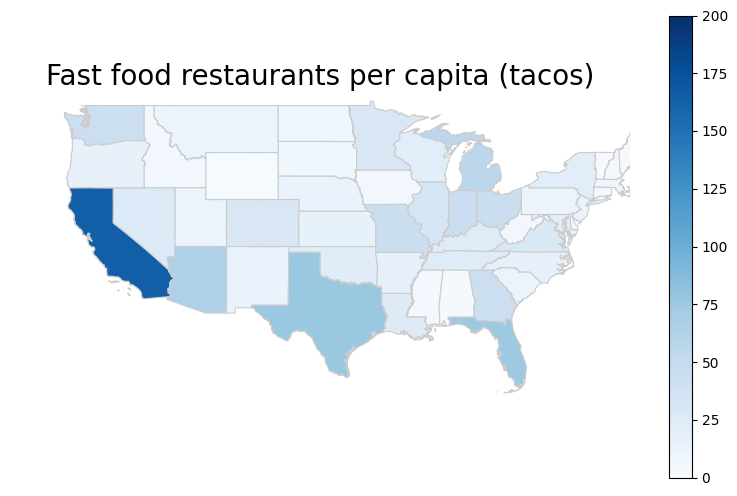

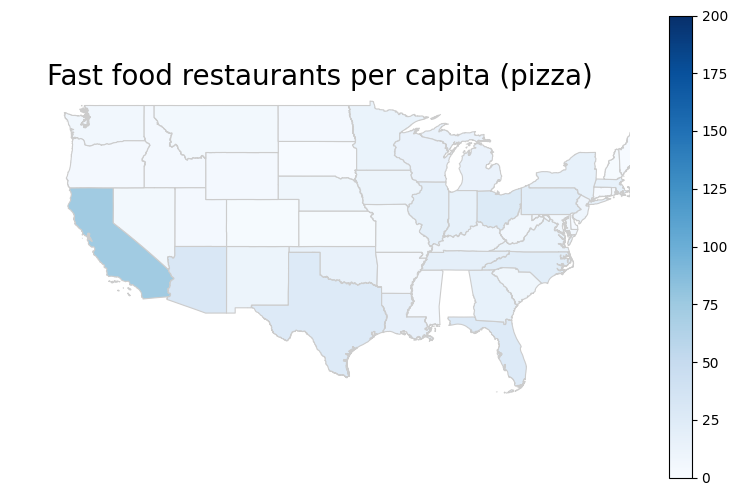

In [97]:
plot_choropleth('burgers')
plot_choropleth('chicken')
plot_choropleth('sandwiches')
plot_choropleth('tacos')
plot_choropleth('pizza')

In [103]:
def plot_choropleth_per_capita(fast_food_type):
    # Filter the data for the specified fast food type
    filtered_data = FF_Locations[FF_Locations['type'] == fast_food_type]
    
    # Group all the data by states
    FF_by_state = filtered_data.groupby('province').size().reset_index(name='counts')

    # Use match() to find the corresponding full state names
    FF_by_state['region'] = FF_by_state['province'].apply(lambda x: states.lookup(x).name if states.lookup(x) is not None else x)

    # Convert to lowercase
    FF_by_state['region'] = FF_by_state['region'].str.lower()

    # Merge the fast food and population data
    merged_data = FF_by_state.merge(population_data, left_on='region', right_on='state')

    # Optional: Remove rows with NaN in the 'population' column
    merged_data = merged_data.dropna(subset=['population'])

    # Now you can calculate the number of fast food restaurants per capita
    merged_data['counts_per_capita'] = merged_data['counts'] / merged_data['population']

    # Merge the filtered data with the map data
    merged_data = us_map.set_index('STUSPS').join(merged_data.set_index('province'))

    # Plot the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size as needed

    merged_data.plot(column='counts_per_capita', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,vmin = 0,vmax = 0.00002)

    ax.set_title(f'Fast food restaurants per capita ({fast_food_type})', fontsize=20)

    # Remove the border
    ax.axis('off')

    # Adjust the extent of the plot to focus on the area below Canada
    ax.set_xlim(-130, -70)  # Adjust these values as needed
    ax.set_ylim(24, 50)  # Adjust these values as needed

    plt.show()
    

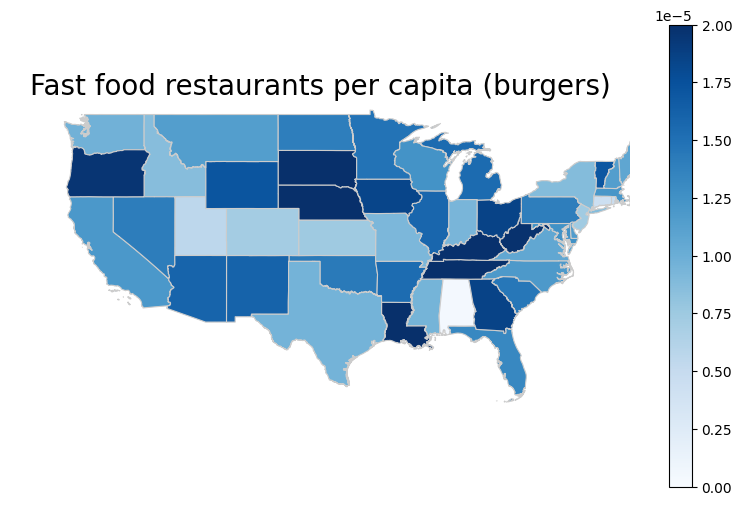

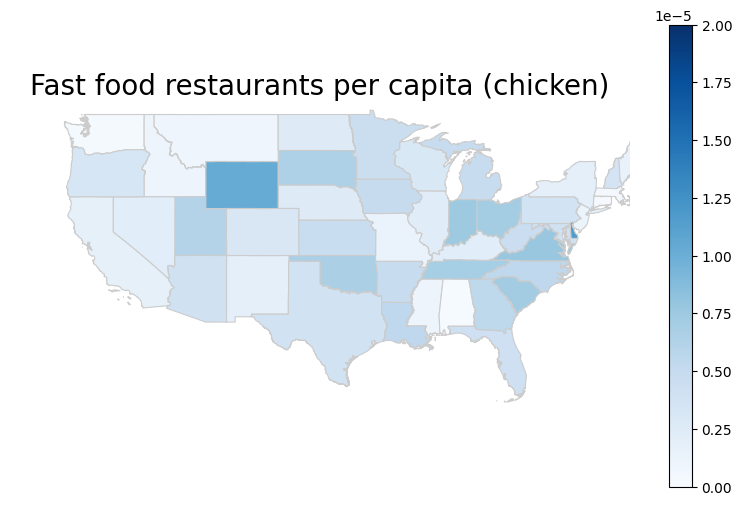

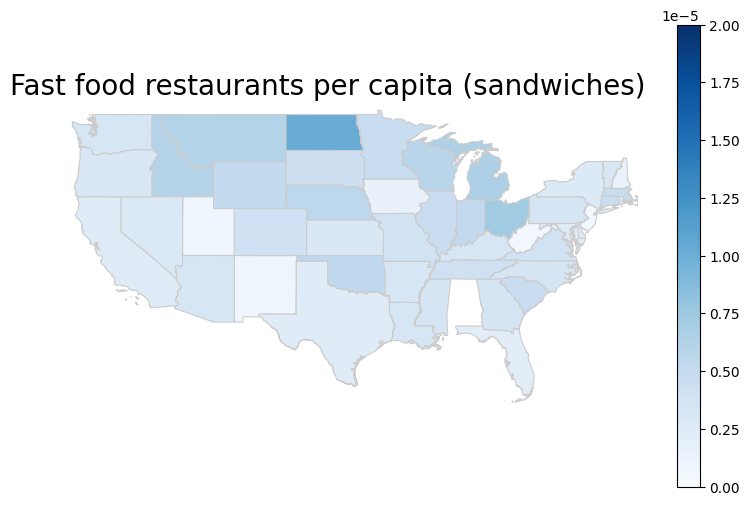

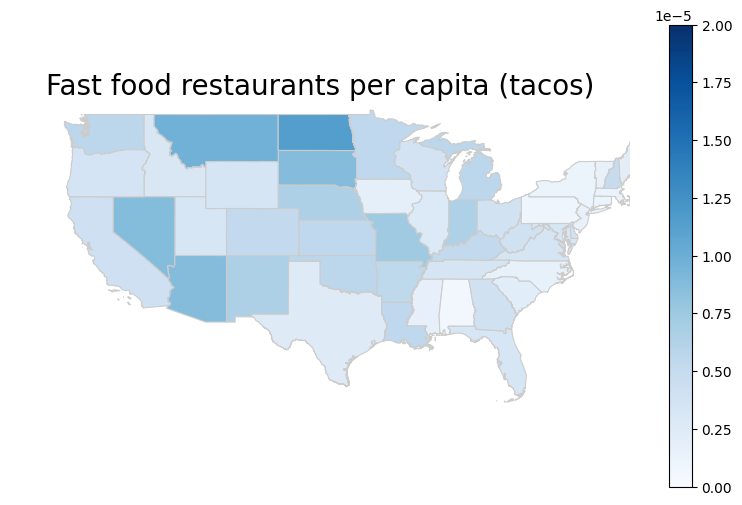

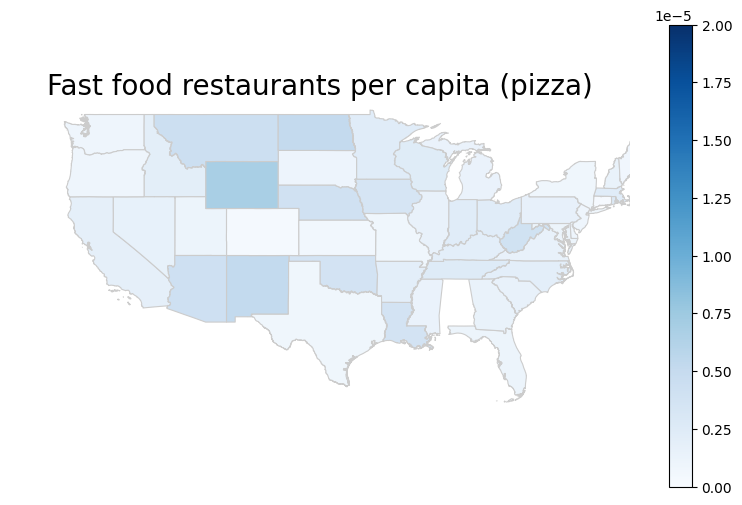

In [104]:
plot_choropleth_per_capita('burgers')
plot_choropleth_per_capita('chicken')
plot_choropleth_per_capita('sandwiches')
plot_choropleth_per_capita('tacos')
plot_choropleth_per_capita('pizza')